/home/leticia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


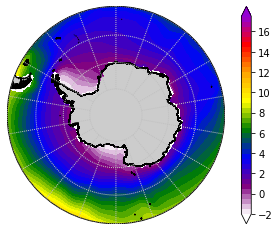

In [38]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 21 01:22:26 2020

@author: leticia
"""

from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as clr

sic = '/home/leticia/Documentos/leticia_dados_CMIP/dados_CMIP5/IPSL/TSM/meantsm.nc'
fh = Dataset(sic, mode='r')
#-----------------------------------------
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
sic = fh.variables['tos'][2,:,:]
sic_units = fh.variables['tos'].units
fh.close()
#-----------------------------------------
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors
#-----------------------------------------
lon_0 = lons.mean()
lat_0 = lats.mean()
#-----------------------------------------
fig=plt.figure(figsize=(6, 4))
m= Basemap(projection='spstere',resolution='f',boundinglat=-50, round=True,lon_0=180)
#-----------------------------------------
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
#levels = np.linspace(-100,100,14, endpoint=True, dtype=int)
#levels=np.array(-100,-75,-50,-25,15,0,15,25,50,75,100)
#sic = m.contourf(xi,yi,sic, cmap=plt.cm.seismic, levels=levels)
norm= matplotlib.colors.Normalize(vmin=-2,vmax=5)

cmap = clr.LinearSegmentedColormap.from_list('mycmap', ['white','purple', 'blue',  'green', 'yellow','orange','red','darkviolet'])

sic = m.contourf(xi,yi,sic,cmap=cmap, levels=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5],extend='both')
#----------------------------------------
#plt.title('Diferença GFDL-CM3.0 e GFDL-CM4')
#plt.title('Diferença MPI-ESM-LR e MPI-ESM1.2-LR')
#plt.title('Diferença NCAR-CCSM4 e NCAR-CESM2')
#m.bluemarble()
m.drawlsmask()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,90.,10.),color='silver')#,labels=[True,True,False,False])
m.drawmeridians(np.arange(0.,360.,20.),color='silver')#,labels=[True,True,True,True])
fig.colorbar(sic, extend="both")
#ticks=[-100,-50,-15,0,15,50,100]
#m.colorbar(sic, ticks=ticks,location='right',shrink=0.5)
plt.show()